In [2]:
import math
import numpy as np
from scipy.stats import norm
l=[495, 520, 510, 505, 480, 500, 515, 495, 510, 505, 490, 515, 495, 505, 500, 510, 485, 495, 500, 520, 510,
495, 505, 500, 515, 505, 495, 510, 500, 495]
l=np.array(l)
mu1=500
std=100
k=len(l)
z=((l.mean()-mu1)*(math.sqrt(k)))/std
print(f"the range of 5%error significance is between {-196/math.sqrt(k) + mu1} and {196/math.sqrt(k) + mu1}")
print(f"the mean of the dataset is{l.mean()}")
print(f"as mean lies between the give range hence hypothesis is accepted")
print(f"the p value is as follows {2-2*(norm.cdf(z))}")

the range of 5%error significance is between 464.2154595763291 and 535.7845404236708
the mean of the dataset is502.6666666666667
as mean lies between the give range hence hypothesis is accepted
the p value is as follows 0.8838745372567058


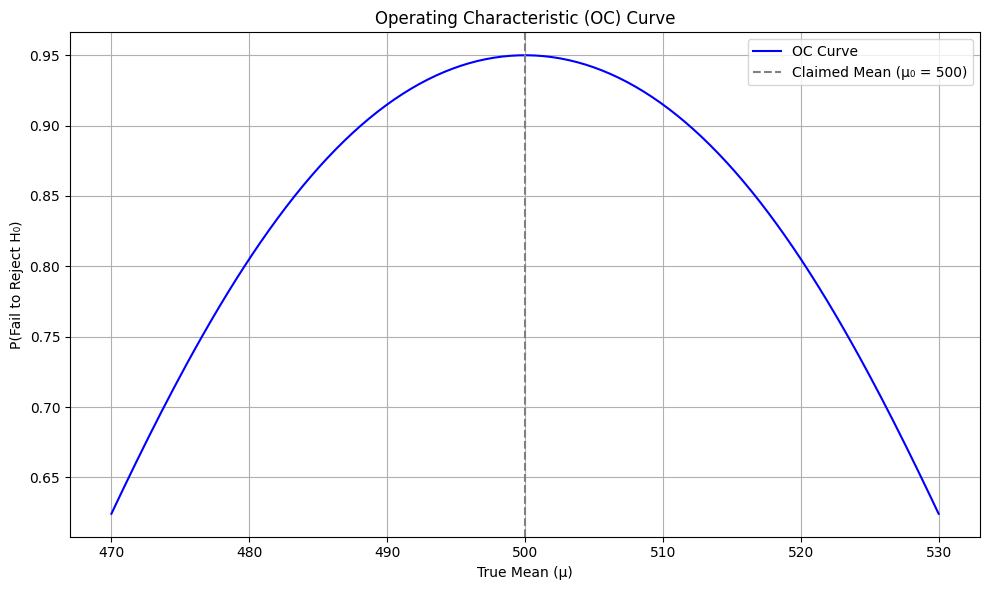

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu_0 = 500
sigma = 100
n = 30
alpha = 0.05

se = sigma / np.sqrt(n)
z_crit = norm.ppf(1 - alpha / 2)
acceptance_lower = mu_0 - z_crit * se
acceptance_upper = mu_0 + z_crit * se

mu_values = np.linspace(470, 530, 200)
beta_values = norm.cdf(acceptance_upper, loc=mu_values, scale=se) - \
              norm.cdf(acceptance_lower, loc=mu_values, scale=se)

plt.figure(figsize=(10, 6))
plt.plot(mu_values, beta_values, label='OC Curve', color='blue')
plt.axvline(mu_0, color='gray', linestyle='--', label='Claimed Mean (μ₀ = 500)')
plt.title("Operating Characteristic (OC) Curve")
plt.xlabel("True Mean (μ)")
plt.ylabel("P(Fail to Reject H₀)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Question no.2

(a)

In [7]:
import numpy as np
import math
from scipy.stats import norm
ph=[340, 344, 362, 375, 356, 386, 354, 364, 332, 402, 340, 355, 362, 322, 372, 324, 318, 360, 338, 370
]
ph=np.array(ph)
mu=350
std=12
k=len(ph)
z=((ph.mean()-mu)/std)*(math.sqrt(n))
e=(1.96)*(std)/math.sqrt(k)
print(f"the range of 5%error significance is between {-e + mu} and {e+ mu}")
print(f"the p value is as follows :{2-2*(norm.cdf(z))}")
if ph.mean()>=-e+mu and ph.mean()<=e+mu:
  print(f"as {ph.mean()} lies between the range hence the claim is excepted")
else:
  print(f"as {ph.mean()} lies outside the range hence the claim is rejected")




the range of 5%error significance is between 344.7407681169205 and 355.2592318830795
the p value is as follows :0.3166392991960294
as 353.8 lies between the range hence the claim is excepted


(b)

In [14]:
from scipy.stats import t
ph=[340, 344, 362, 375, 356, 386, 354, 364, 332, 402, 340, 355, 362, 322, 372, 324, 318, 360, 338, 370
]
ph=np.array(ph)
mu=350
k=len(ph)
sample_std = np.std(ph, ddof=1)
t_stat = (ph.mean() - mu) / (sample_std / np.sqrt(k))
p_value = 2 * (1 - t.cdf(abs(t_stat), df=n-1))
print("Sample Mean:", round(ph.mean(), 4))
print("Sample Standard Deviation:", round(sample_std, 4))
print("t-Statistic:", round(t_stat, 4))
print("p-value:", round(p_value, 4))
if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis (significant evidence against the claim).")
else:
    print(f"Conclusion: Fail to reject the null hypothesis (not enough evidence to contradict the claim) therefore 350 might be the mean ")

Sample Mean: 353.8
Sample Standard Deviation: 21.8478
t-Statistic: 0.7778
p-value: 0.443
Conclusion: Fail to reject the null hypothesis (not enough evidence to contradict the claim).


Question 3

In [2]:
import numpy as np
from scipy.stats import t


before = np.array([85.2, 78.5, 92.3, 80.0, 88.7, 76.4, 90.5, 84.1, 79.0, 86.2])
after  = np.array([82.5, 75.8, 90.1, 77.2, 85.4, 74.5, 87.6, 81.3, 76.8, 83.0])


diff = before - after


mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1)
n = len(diff)
t_stat = mean_diff / (std_diff / np.sqrt(n))


p_value = 2 * (1 - t.cdf(abs(t_stat), df=n-1))


print("Mean Difference:", round(mean_diff, 4))
print("Standard Deviation of Differences:", round(std_diff, 4))
print("t-Statistic:", round(t_stat, 4))
print("p-value:", round(p_value, 4))

if p_value < 0.05:
    print("Conclusion: Reject H₀ → The diet has a significant effect.")
else:
    print("Conclusion: Fail to reject H₀ → No significant effect detected.")


Mean Difference: 2.67
Standard Deviation of Differences: 0.4473
t-Statistic: 18.8745
p-value: 0.0
Conclusion: Reject H₀ → The diet has a significant effect.


Question 4

In [3]:
import numpy as np
from scipy.stats import chi2
volumes = np.array([502, 498, 505, 497, 503, 499, 504, 496, 501, 500, 506, 495, 502, 498, 504])
sigma_sq_0 = 4
alpha = 0.01

def variance_test(data, sigma_sq_0, alpha):
    n = len(data)
    sample_var = np.var(data, ddof=1)
    chi_stat = (n - 1) * sample_var / sigma_sq_0
    p_value = 1 - chi2.cdf(chi_stat, df=n - 1)
    critical_value = chi2.ppf(1 - alpha, df=n - 1)

    print("Sample Variance:", round(sample_var, 4))
    print("Chi-square Statistic:", round(chi_stat, 4))
    print("Critical Value (χ²₀.₉₉):", round(critical_value, 4))
    print("p-value:", round(p_value, 4))

    if chi_stat > critical_value:
        print("Conclusion: Reject H₀ → Variance exceeds specification.")
    else:
        print("Conclusion: Fail to reject H₀ → Variance is within acceptable limits.")

print("=== Full Dataset ===")
variance_test(volumes, sigma_sq_0, alpha)


filtered_volumes = volumes[(volumes >= 495) & (volumes <= 505)]

print("\n=== After Removing Outliers (<495 or >505) ===")
variance_test(filtered_volumes, sigma_sq_0, alpha)


=== Full Dataset ===
Sample Variance: 11.6667
Chi-square Statistic: 40.8333
Critical Value (χ²₀.₉₉): 29.1412
p-value: 0.0002
Conclusion: Reject H₀ → Variance exceeds specification.

=== After Removing Outliers (<495 or >505) ===
Sample Variance: 10.2198
Chi-square Statistic: 33.2143
Critical Value (χ²₀.₉₉): 27.6882
p-value: 0.0016
Conclusion: Reject H₀ → Variance exceeds specification.
